In [1]:
!conda install pytorch==2.0.0 torchvision==0.15.0 torchaudio==2.0.0 -c pytorch --yes


import sys
print(sys.executable)
import math
import numpy as np

import torch

import librosa
import IPython.display as ipd
import numpy as np

import IPython.display as ipd
import matplotlib.pyplot as plt
import random as raondom

from torch.utils.data import random_split

from torch.utils.data import DataLoader, Dataset, random_split


import os as os

from tqdm.notebook import tqdm_notebook
import matplotlib.pyplot as plt

import random 

from transformers import AutoConfig, Wav2Vec2Processor, Wav2Vec2FeatureExtractor


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/ywrz/opt/anaconda3

  added / updated specs:
    - pytorch==2.0.0
    - torchaudio==2.0.0
    - torchvision==0.15.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cctools-949.0.1            |      h9abeeb2_23          20 KB
    cctools_osx-64-949.0.1     |      hc7db93f_23         1.3 MB
    conda-22.9.0               |   py38hecd8cb5_0         884 KB
    conda-build-3.24.0         |   py38hecd8cb5_0         570 KB
    ld64-530                   |      h20443b4_23          18 KB
    ld64_osx-64-530            |      h70f3046_23         919 KB
    ldid-2.1.2                 |       h2d21305_2          54 KB
    patch-2.7.6                |    h1de35cc_1001         128 KB
    pytorch-2.0.0              |          py3.8_0      

In [2]:
import torchaudio


import torchaudio.functional as F
import torchaudio.transforms as T

import torch.nn as nn

print(torch.__version__)
print(torchaudio.__version__)

2.0.0
2.0.0



<span style="color:red;font-weight:700;font-size:20px">
mfcc transformation
</span>

In [17]:
#audio_mfcc including adding random number of paddings at front and end 
import random   
def audio_mfcc(sample): 
    waveform, sample_rate = torchaudio.load(sample)
    waveform=waveform[:1,:]
    
    n_fft = 2048
    win_length = None
    hop_length = 512
    n_mels = 20
    n_mfcc = 20

    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,y
        n_mfcc=n_mfcc,
        melkwargs={
          'n_fft': n_fft,
          'n_mels': n_mels,
          'hop_length': hop_length,
          'mel_scale': 'htk',
        }
    )

    mfcc = mfcc_transform(waveform)
    print(mfcc.shape)
    #set 1000 windows 
    if mfcc.shape[2]<1000:
        padding_f=random.randint(0,1000-mfcc.shape[2])
        padding_r=1000-mfcc.shape[2]-padding_f
        front=torch.zeros((1,20,padding_f))
        end=torch.zeros((1,20,padding_r))
        
        mfcc=torch.cat((front,mfcc,end),2)

    else:
        mfcc=mfcc[:,:,:1000]
    return mfcc



#audio_mfcc without adding random number of paddings at front and end 

import random   
def audio_mfcc_2(sample): 
#     waveform, sample_rate = torchaudio.load(sample)
#     waveform=waveform[:1,:]
    
    n_fft = 2048
    win_length = None
    hop_length = 512
    n_mels = 20
    n_mfcc = 20

    mfcc_transform = T.MFCC(
        sample_rate=sample_rate,
        n_mfcc=n_mfcc,
        melkwargs={
          'n_fft': n_fft,
          'n_mels': n_mels,
          'hop_length': hop_length,
          'mel_scale': 'htk',
        }
    )

    mfcc = mfcc_transform(sample)

    return mfcc



<span style="color:green;font-weight:1800;font-size:30px">
labels reading from Json 
</span><br/><br/>
<span style="color:red;font-weight:700;font-size:20px">

</span>

In [3]:
# showing NaN labels for each psychatrist
import pandas as pd
df = pd.read_json('voice_labels.json', orient ='index')
values={'fear':'none' ,'anger': 'none','happy': 'none','neutral': 'none','sadness':'none'}
values={'fear':math.nan ,'anger':math.nan,'happy':math.nan,'neutral':math.nan,'sadness':math.nan}
print(df.isna().sum())


df.columns=['P','Y','M','S'] 
for i in df.columns:
    df[i]=df[i].apply(lambda x:values if x!=x else x) 




Pegah Moghaddam    320
Yared Alemu         18
Michelle Lyn        29
Sedara Burson       66
dtype: int64



<span style="color:green;font-weight:1800;font-size:20px">
mean opinion for 'fear', 'sadness' and 'anger' across 4 experts
</span>

In [6]:
df_list=[]
for i in df.columns:
#     temp_df=pd.DataFrame(df[i].apply(pd.Series))
#     temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
#     df_list.append(temp_df)

    temp_df=df[i].apply(pd.Series)
    temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
    df_fear=temp_df['sadness']
    df_list.append(df_fear)
df_fear=pd.DataFrame({'P':df_list[0],'Y':df_list[1],'M':df_list[2],'S':df_list[3]})
mean_fear=pd.DataFrame(pd.DataFrame.mean(df_fear,axis=1))

mean_fear=mean_fear.reset_index()
mean_fear.columns=['path','label_ID']
mean_fear.replace({'m4a':'wav'}, regex=True,inplace=True)
mean_sadness=round(mean_fear).astype({'label_ID':int})
df_list

[1940_39117_1161625039.wav         3.0
 6529_53113_3443309365.wav         3.0
 9926_39117_1370960430.wav         3.0
 4205_39117_2156262111.wav         2.0
 65308_26501_3048138818.wav        3.0
                                  ... 
 4538_53113_1601424000.m4a         NaN
 1491497_RDR1001_4139736786.wav    NaN
 296_SRC1001_108957776.wav         NaN
 2015066_SK1001_979462084.wav      NaN
 2527_GS1001_399191702.wav         NaN
 Name: sadness, Length: 1055, dtype: float64,
 1940_39117_1161625039.wav         2.0
 6529_53113_3443309365.wav         2.0
 9926_39117_1370960430.wav         3.0
 4205_39117_2156262111.wav         2.0
 65308_26501_3048138818.wav        NaN
                                  ... 
 4538_53113_1601424000.m4a         2.0
 1491497_RDR1001_4139736786.wav    2.0
 296_SRC1001_108957776.wav         2.0
 2015066_SK1001_979462084.wav      2.0
 2527_GS1001_399191702.wav         NaN
 Name: sadness, Length: 1055, dtype: float64,
 1940_39117_1161625039.wav         0.0
 6529_53113

In [5]:
df_list=[]
for i in df.columns:
#     temp_df=pd.DataFrame(df[i].apply(pd.Series))
#     temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
#     df_list.append(temp_df)

    temp_df=df[i].apply(pd.Series)
    temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
    df_fear=temp_df['anger']
    df_list.append(df_fear)

df_fear=pd.DataFrame({'P':df_list[0],'Y':df_list[1],'M':df_list[2],'S':df_list[3]})
mean_fear=pd.DataFrame(pd.DataFrame.mean(df_fear,axis=1))

mean_fear=mean_fear.reset_index()
mean_fear.columns=['path','label_ID']
mean_fear.replace({'m4a':'wav'}, regex=True,inplace=True)
mean_anger=round(mean_fear).astype({'label_ID':int})

In [8]:
df_list=[]
for i in df.columns:
#     temp_df=pd.DataFrame(df[i].apply(pd.Series))
#     temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
#     df_list.append(temp_df)

    temp_df=df[i].apply(pd.Series)
    temp_df.replace({'high':3,'medium':2,'low':1,'none':0},inplace=True)
    
    df_fear=temp_df['fear']
    df_list.append(df_fear)
    
df_fear=pd.DataFrame({'P':df_list[0],'Y':df_list[1],'M':df_list[2],'S':df_list[3]})
mean_fear=pd.DataFrame(pd.DataFrame.mean(df_fear,axis=1))

mean_fear=mean_fear.reset_index()
mean_fear.columns=['path','label_ID']
mean_fear.replace({'m4a':'wav'}, regex=True,inplace=True)
mean_fear=round(mean_fear).astype({'label_ID':int})

In [9]:
# Tables for reding
display(mean_sadness)
display(mean_anger)
display(mean_fear)

,path,label_ID
0,1940_39117_1161625039.wav,1
1,6529_53113_3443309365.wav,2
2,9926_39117_1370960430.wav,2
3,4205_39117_2156262111.wav,2
4,65308_26501_3048138818.wav,3
...,...,...
1050,4538_53113_1601424000.wav,2
1051,1491497_RDR1001_4139736786.wav,1
1052,296_SRC1001_108957776.wav,1
1053,2015066_SK1001_979462084.wav,2


,path,label_ID
0,1940_39117_1161625039.wav,1
1,6529_53113_3443309365.wav,1
2,9926_39117_1370960430.wav,1
3,4205_39117_2156262111.wav,1
4,65308_26501_3048138818.wav,3
...,...,...
1050,4538_53113_1601424000.wav,1
1051,1491497_RDR1001_4139736786.wav,1
1052,296_SRC1001_108957776.wav,1
1053,2015066_SK1001_979462084.wav,0


,path,label_ID
0,1940_39117_1161625039.wav,2
1,6529_53113_3443309365.wav,2
2,9926_39117_1370960430.wav,2
3,4205_39117_2156262111.wav,2
4,65308_26501_3048138818.wav,3
...,...,...
1050,4538_53113_1601424000.wav,1
1051,1491497_RDR1001_4139736786.wav,2
1052,296_SRC1001_108957776.wav,1
1053,2015066_SK1001_979462084.wav,2


<span style="color:green;font-weight:1800;font-size:20px">
Randomly picking 844 samples fro training for 'fear','sadness','anger'
</span><br/><br/>
<span style="color:green;font-weight:700;font-size:15px">Each dataset expand for five times </span>

In [17]:
#genrate 
a=list(range(1055))
random.shuffle(a)

In [883]:
#picking 
mean_sadness_train=mean_sadness.iloc[a[:844],:]
mean_sadness_test=mean_sadness.iloc[a[844:],:]
mean_sadness_5=pd.concat([mean_sadness_train,mean_sadness_train,mean_sadness_train,mean_sadness_train,mean_sadness_train,])
mean_sadness_5

,path,label_ID
644,57545_39117_1592352000.wav,2
799,4493_53113_1589846400.wav,2
560,1940_39117_1130261374.wav,1
528,1940_39117_1603584000.wav,1
661,1493767_RDR1001_3432834742.wav,2
...,...,...
964,6709_53113_1576195200.wav,3
25,8953_39117_4158290298.wav,0
1025,4644_53113_1588204800.wav,0
643,57545_39117_1592265600.wav,2


In [1035]:
a=list(range(1055))
random.shuffle(a)
mean_anger_train=mean_anger.iloc[a[:844],:]
mean_anger_test=mean_anger.iloc[a[844:],:]
mean_anger_5=pd.concat([mean_anger_train,mean_anger_train,mean_anger_train,mean_anger_train,mean_anger_train])
mean_anger_5

,path,label_ID
829,6461_39117_4106733806.wav,1
430,73042_72285_912404363.wav,1
968,6709_53113_1581638400.wav,1
200,55119_53113_1571270400.wav,1
347,8161_39117_640821667.wav,2
...,...,...
604,139_39117_1589414400.wav,0
660,6461_39117_1694199414.wav,0
248,140406_53113_1573516800.wav,2
783,8447_53113_1599609600.wav,1


In [1201]:
mean_fear_train=mean_fear.iloc[a[:844],:]
mean_fear_test=mean_fear.iloc[a[844:],:]
mean_fear_5=pd.concat([mean_fear_train,mean_fear_train,mean_fear_train,mean_fear_train,mean_fear_train])
mean_fear_5

,path,label_ID
1,6529_53113_3443309365.wav,2
389,5370_39117_199618701.wav,1
611,139_39117_1597881600.wav,1
993,6529_53113_1606089600.wav,1
951,6708_53113_1580428800.wav,1
...,...,...
718,1967_SK1001_2161601137.wav,1
935,4644_53113_1594598400.wav,0
361,8953_39117_2918230285.wav,1
263,55035_53113_1572912000.wav,1


<span style="color:green;font-weight:1800;font-size:20px">
Dataset generation for sadness/anger/fear
</span> <br/><br/>
<span style="color:green;font-weight:700;font-size:15px">five segments were picked from one sample</span>

In [1093]:

#dataset 1 to include all the transformed tensors for local use
from torch.utils.data import DataLoader, Dataset, random_split
import torchaudio

# ----------------------------
# Sound Dataset
# ----------------------------
class TQI_DS_2(Dataset):
    def __init__(self, df_lable, data_path='',prefix='16Khz_'):
        self.df = df_lable 
        self.data_path = str(data_path)
        self.prefix=prefix

  # ----------------------------
  # Number of items in dataset
  # ----------------------------
    def __len__(self):
        return len(self.df) 
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
    def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
       
        audio_file = self.data_path + self.prefix+ self.df.loc[idx, 'path']
        waveform,_ = torchaudio.load(audio_file)
        waveform=waveform[:1,:]

        
    # Get the Class ID
        class_id = self.df.loc[idx, 'label_ID']
        class_id_1 = self.df.loc[idx, 'path']
        
        
        if waveform.shape[1] >= 78530:
            start_point=random.randint(0,waveform.shape[1]-79531)
            mfcc_temp= audio_mfcc_2(waveform[0:1,start_point:start_point+270000])
    # substitute those with no sound with one valid .wav file from the dataset  
        else: 
            audio_file = '16Khz_6709_53113_1570147200.wav'
            class_id_1='16Khz_6709_53113_1570147200.wav'
            waveform,_ = torchaudio.load(audio_file)
            waveform=waveform[:1,:]
            start_point=random.randint(0,waveform.shape[1]-79531)
            
            class_id = 2
            mfcc_temp= audio_mfcc_2(waveform[0:1,start_point:start_point+270000])
        
           
        if mfcc_temp.shape[2]<528:
#             print('yes')
#             print(mfcc_temp.shape)
            padding_f=random.randint(0,528-mfcc_temp.shape[2])
#             print(padding_f)
            
            padding_r=528-mfcc_temp.shape[2]-padding_f
#             print(padding_r)
            
            
            front=torch.zeros((1,20,padding_f))
            end=torch.zeros((1,20,padding_r))
        
            mfcc_final=torch.cat((front,mfcc_temp,end),2)
#             print(mfcc_final)
        else:
            mfcc_final=mfcc_temp
        
        return mfcc_final,class_id, class_id_1

        
        

In [1094]:
# transformed data_set were used to read mfcc transformed dataset stored locally
class transformed_data(Dataset):
    def __init__(self, path):
        self.path = path  #img path
    
    def __getitem__(self, idx):        
        sample_ls= os.listdir(self.path)        
        sample_path=os.path.join(self.path,sample_ls[idx])
        audio_tensor = torch.load(sample_path) 
        return audio_tensor[0], audio_tensor[1],  audio_tensor[2], 

    def __len__(self):
        return len(os.listdir(self.path))
    

In [1223]:
# dataset generation and save, it worked despite the error message
dataset_anger=TQI_DS_2(mean_anger_5.reset_index())
#save the transformed data before CNN training
path = '/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_anger' 
#path put all the tensor and lable under/sample_test
os.makedirs(path, exist_ok = True) 
# torch.save(tensor , os.path.join(path,'model.pth'))
for idx, data in enumerate(dataset_anger):
    torch.save(data, os.path.join(path,f'sample_{idx}'))


KeyError: 4220

In [1224]:
# reading dataset previously saved 
dataset_anger_2=\
transformed_data('/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_anger/')

In [1225]:
num_train = len(dataset_anger_2)
train_ds, val_ds = random_split(dataset_anger_2, [num_train,0])
train_dl = torch.utils.data.DataLoader(train_ds,batch_size=32, shuffle=True)

<span style="color:red;font-weight:1800;font-size:30px">
CNN model
</span><br/><br/>
<span style="color:red;font-weight:1800;font-size:20px">
Training
</span>


In [1226]:
#CNN model
class Classifier (nn.Module):
    # ----------------------------
    # Build the model architecture
    # ----------------------------
    def __init__(self):
        super().__init__()
        conv_layers = []
        # First Convolution Block with Relu and Batch Norm.
        self.conv1 = nn.Conv2d(1, 8, kernel_size=(3,3), stride=(2, 2), padding=(2, 10))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        
        conv_layers += [self.conv1, self.relu1, self.bn1]


        # Second Convolution Block
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3,3), stride=(2, 2), padding=(2, 2))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        conv_layers += [self.conv2, self.relu2, self.bn2]

        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(2, 2))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        conv_layers += [self.conv3, self.relu3, self.bn3]
       
        self.conv = nn.Sequential(*conv_layers)
        self.ap=nn.AvgPool2d((2,5))
        self.lin=nn.Linear(896,4)
    
    def forward(self,x):
            
        x=self.conv(x) 
#         print(x.shape)
        x=self.ap(x)
#         print(x.shape)
        x = x.view(x.shape[0], -1)
#         print(x.shape)
        x=self.lin(x)
        return x
            
     

In [1227]:
#training
loss_history_anger=[]
accuracy_history_anger=[]
def training(model, train_dl,num_epochs):
  # Loss Function, Optimizer and Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#   scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
#                                                 steps_per_epoch=int(len(train_dl)),
#                                                 epochs=num_epochs,
#                                                 anneal_strategy='linear')

  # Repeat for each epoch
    for epoch in tqdm_notebook(range(num_epochs)):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

    # Repeat for each batch in the training set
        for i, data in enumerate(train_dl):
        # Get the input features and target labels, and put them on the GPU
            inputs, labels = data[0], data[1]

        # Normalize the inputs
#             inputs_m, inputs_s = inputs.mean(), inputs.std()
#             inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
        # Keep stats for Loss and Accuracy
            running_loss += loss.item()

        # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]
        
        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction/total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')
        loss_history_anger.append(avg_loss)
        accuracy_history_anger.append(acc)



In [1233]:
#model_training, the same code had been used repetitively for 'fear','anger',''
model_anger=Classifier()
training(model_anger, train_dl, 40)

  0%|          | 0/20 [00:00<?, ?it/s]

Exception ignored in: <function tqdm.__del__ at 0x7fb8bb9d7790>
Traceback (most recent call last):
  File "/Users/ywrz/opt/anaconda3/lib/python3.8/site-packages/tqdm/std.py", line 1161, in __del__
    def __del__(self):
KeyboardInterrupt: 


Epoch: 0, Loss: 0.29, Accuracy: 0.89
Epoch: 1, Loss: 0.27, Accuracy: 0.89
Epoch: 2, Loss: 0.19, Accuracy: 0.93
Epoch: 3, Loss: 0.21, Accuracy: 0.92
Epoch: 4, Loss: 0.20, Accuracy: 0.92
Epoch: 5, Loss: 0.19, Accuracy: 0.92
Epoch: 6, Loss: 0.15, Accuracy: 0.95
Epoch: 7, Loss: 0.17, Accuracy: 0.93
Epoch: 8, Loss: 0.18, Accuracy: 0.93
Epoch: 9, Loss: 0.13, Accuracy: 0.95
Epoch: 10, Loss: 0.12, Accuracy: 0.95
Epoch: 11, Loss: 0.15, Accuracy: 0.94
Epoch: 12, Loss: 0.15, Accuracy: 0.94
Epoch: 13, Loss: 0.17, Accuracy: 0.94
Epoch: 14, Loss: 0.15, Accuracy: 0.94
Epoch: 15, Loss: 0.11, Accuracy: 0.96
Epoch: 16, Loss: 0.09, Accuracy: 0.97
Epoch: 17, Loss: 0.10, Accuracy: 0.96
Epoch: 18, Loss: 0.11, Accuracy: 0.96
Epoch: 19, Loss: 0.09, Accuracy: 0.97



<span style="color:red;font-weight:1800;font-size:20px">
Loss Curve for all three datasets in training
</span>


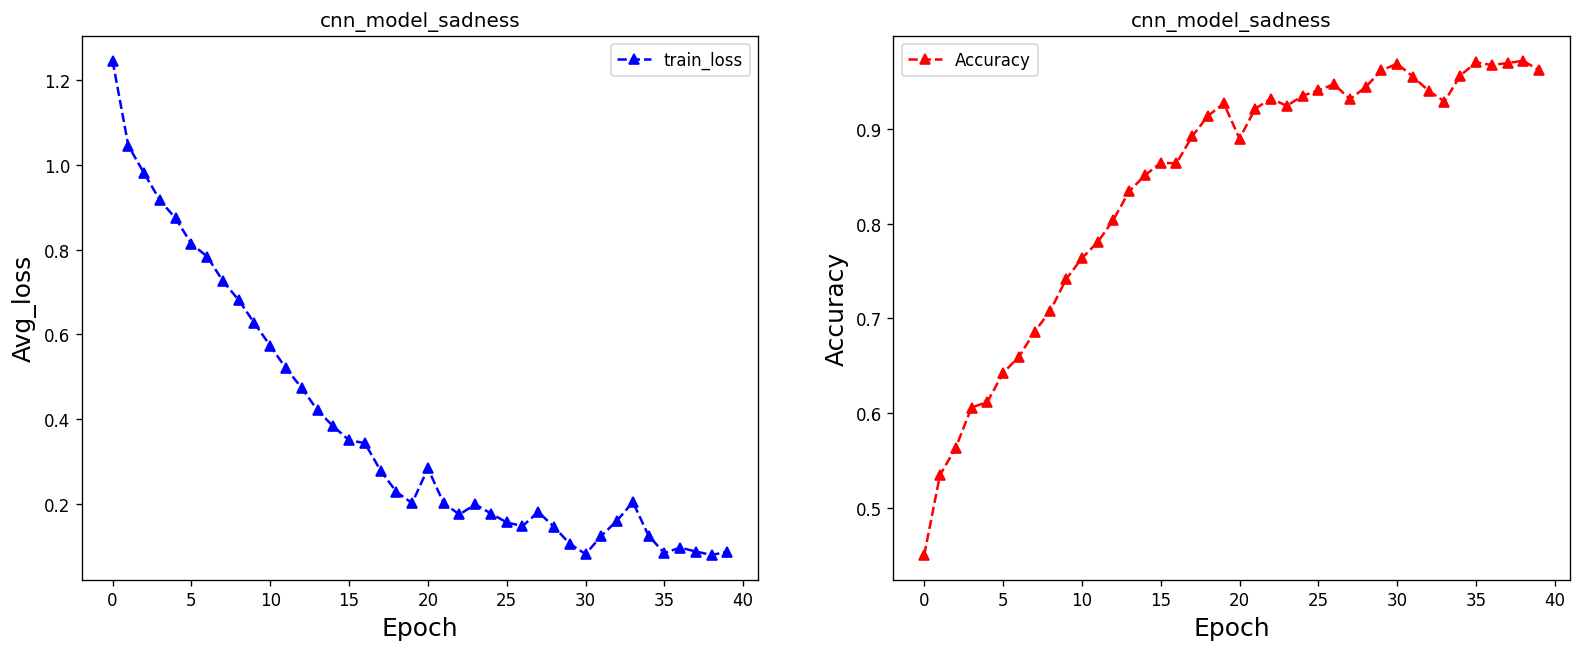

In [1241]:
# curve
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_history[:40], 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("cnn_model_sadness")
plt.legend(loc='best')
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_history[:40], 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("cnn_model_sadness")
plt.legend(loc='best')


# code for figure 2



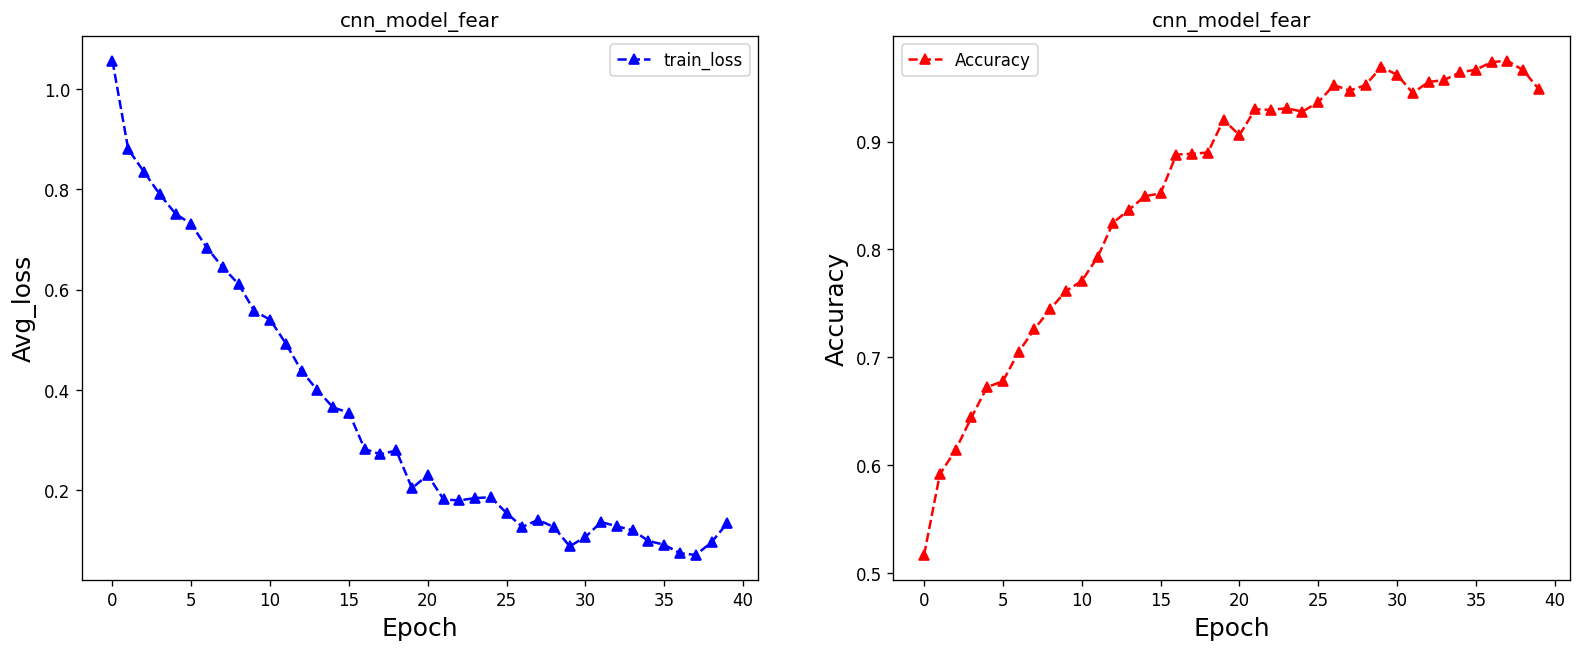

In [1211]:
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_history_fear, 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("cnn_model_fear")
plt.legend(loc='best')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_history_fear, 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("cnn_model_fear")
plt.legend(loc='best')


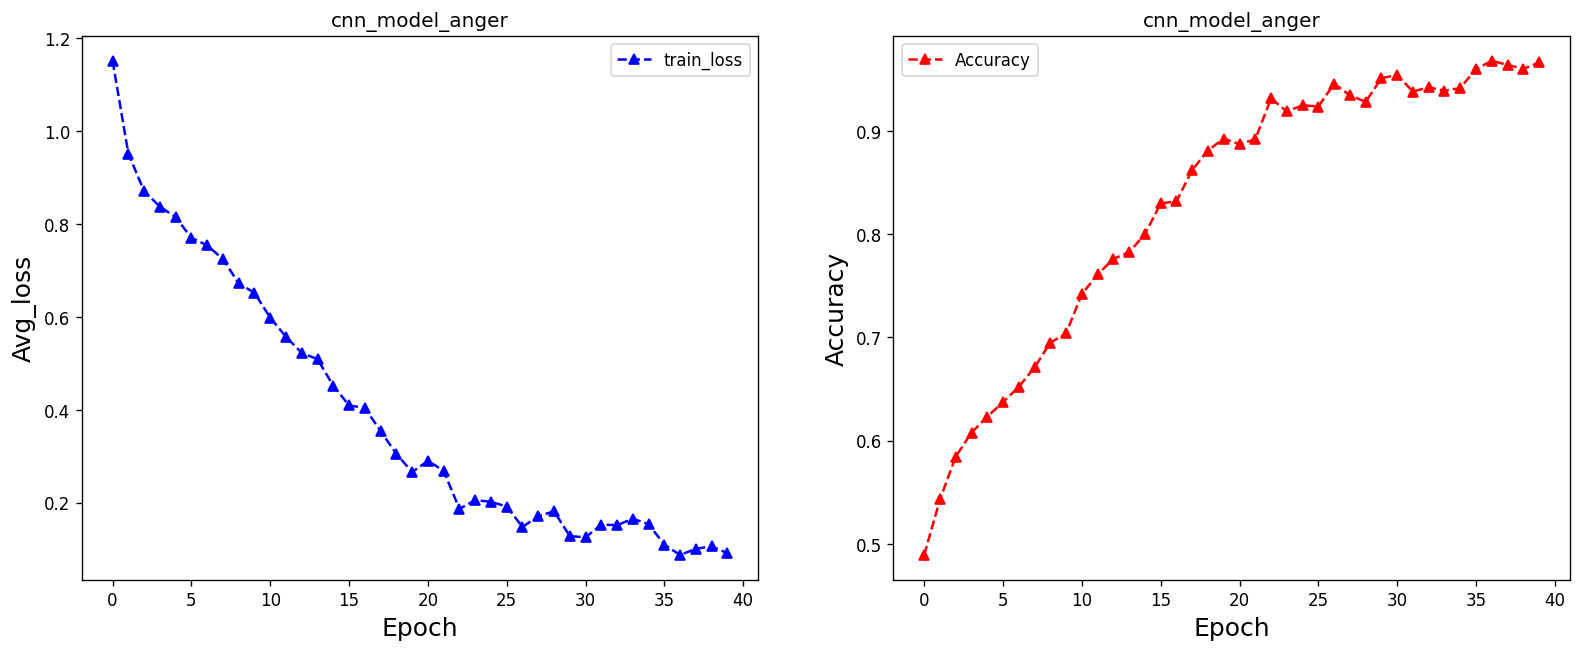

In [1234]:
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_history_anger, 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("cnn_model_anger")
plt.legend(loc='best')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_history_anger, 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("cnn_model_anger")
plt.legend(loc='best')


<span style="color:red;font-weight:1800;font-size:20px">
Modle Validation
</span><br/><br/>
<span style="color:red;font-weight:1800;font-size:20px">
Building dataset for testing
</span><br/>



In [1181]:
# the process has been repeated for all three dataset 'fear','anger' and 'sadness'
# 211 samples never used in training were picked for testing, 211*5=1055 segments were used to generate raw accuracy
comb_anger_test=pd.concat([mean_anger_test,mean_anger_test,mean_anger_test,mean_anger_test,mean_anger_test])
dataset_test=TQI_DS_2(comb_anger_test.reset_index())
path = '/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_fear_test' 

os.makedirs(path, exist_ok = True) 
# torch.save(tensor , os.path.join(path,'model.pth'))

for idx, data in enumerate(dataset_test):

    torch.save(data, os.path.join(path,f'sample_{idx}'))


KeyError: 1055

In [ ]:
# reading the local stored dataset and loaded  into batches 
dataset2=transformed_data('/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_anger_test')
_, test_ds = random_split(dataset2, [0,1055])
test_dl = torch.utils.data.DataLoader(test_ds,batch_size=1055, shuffle=True)

In [1240]:
# raw accuracy 

correct_prediction = 0
total_prediction = 0

with torch.no_grad():
    for data in test_dl:
      
      # Get the input features and target labels, and put them on the GPU
        inputs, labels, wav = data[0], data[1], data[2] 
        
      # Normalize the inputs
#         inputs_m, inputs_s = inputs.mean(), inputs.std()
#         inputs = (inputs - inputs_m) / inputs_s
      # Get predictions
        outputs =model_sadness(inputs)
    
      # Get the predicted class with the highest score
            
        
    
        _, prediction = torch.max(outputs,1)
        

      # Count of predictions that matched the target label
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]

acc = correct_prediction/total_prediction
print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')


Accuracy: 0.31, Total items: 1055


In [1236]:
#predition using voting methods, final accuracy. The most common value among five segments for each sample.
test_prediction = ({
    '.wav':wav,
    'pred_1' : prediction,
    
    'true_label':labels
               })
test_prediction = pd.DataFrame(test_prediction)
a=test_prediction.groupby('.wav').agg({'pred_1': lambda x:x.value_counts().index[0],
                                       'true_label': lambda x:x.value_counts().index[0]}).reset_index()

(a['pred_1']==a['true_label']).sum()/211

0.6445497630331753

<span style="color:red;font-weight:1800;font-size:30px">
Saving models
</span><br/>

In [1237]:
#save model
torch.save(model_sadness.state_dict(),'cnn_model_sadness.pth')
torch.save(model_fear.state_dict(),'cnn_model_fear.pth')
torch.save(model_anger.state_dict(),'cnn_model_anger.pth')
# test_model=Classifier()
# test_model.load_state_dict(torch.load('model_fear.pth'))

<span style="color:red;font-weight:1800;font-size:20px">
loading saved model for future training
</span><br/>

In [1028]:
#loading models examples
test_model=Classifier()
test_model.load_state_dict(torch.load('model_fear.pth'))

<All keys matched successfully>

<span style="color:red;font-weight:1800;font-size:30px">
ResNet34 model
</span><br/><br/>


In [1218]:
from torchvision.models import resnet34
import torch
import torch.nn as nn
import torch.optim as optim
# if torch.cuda.is_available():
#     device=torch.device('cuda:0')
# else:
#     device=torch.device('cpu')
resnet_model = resnet34(pretrained=True)
resnet_model.fc = nn.Linear(512,5)
resnet_model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

resnet_model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<span style="color:red;font-weight:1800;font-size:20px">
Training model
</span><br/>

In [1220]:
#training model

# ----------------------------
# Training Loop
# ----------------------------
loss_record_resnet=[]
accuracy_record_resnet=[]


def training(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
    loss_record_resent=[]
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
#   scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
#                                                 steps_per_epoch=int(len(train_dl)),
#                                                 epochs=num_epochs,
#                                                 anneal_strategy='linear')

  # Repeat for each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

    # Repeat for each batch in the training set
        
        
        
        for i, data in enumerate(tqdm_notebook(train_dl)):
        # Get the input features and target labels, and put them on the GPU
            inputs, labels = data[0], data[1]

        # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            

        # Keep stats for Loss and Accuracy
            running_loss += loss.item()

        # Get the predicted class with the highest score
            _, prediction = torch.max(outputs,1)
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction/total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')
        loss_record_resnet.append(avg_loss)
        accuracy_record_resnet.append(acc)
        
   
        
        
num_epochs=10  # Just for demo, adjust this higher.
training(resnet_model, train_dl, 10)


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 0, Loss: 1.16, Accuracy: 0.46


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.99, Accuracy: 0.45


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.98, Accuracy: 0.45


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.97, Accuracy: 0.46


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.98, Accuracy: 0.46


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.97, Accuracy: 0.45


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.97, Accuracy: 0.46


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.97, Accuracy: 0.47


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.97, Accuracy: 0.46


  0%|          | 0/132 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.96, Accuracy: 0.46


<span style="color:red;font-weight:1800;font-size:20px">
loss curve during training
</span>


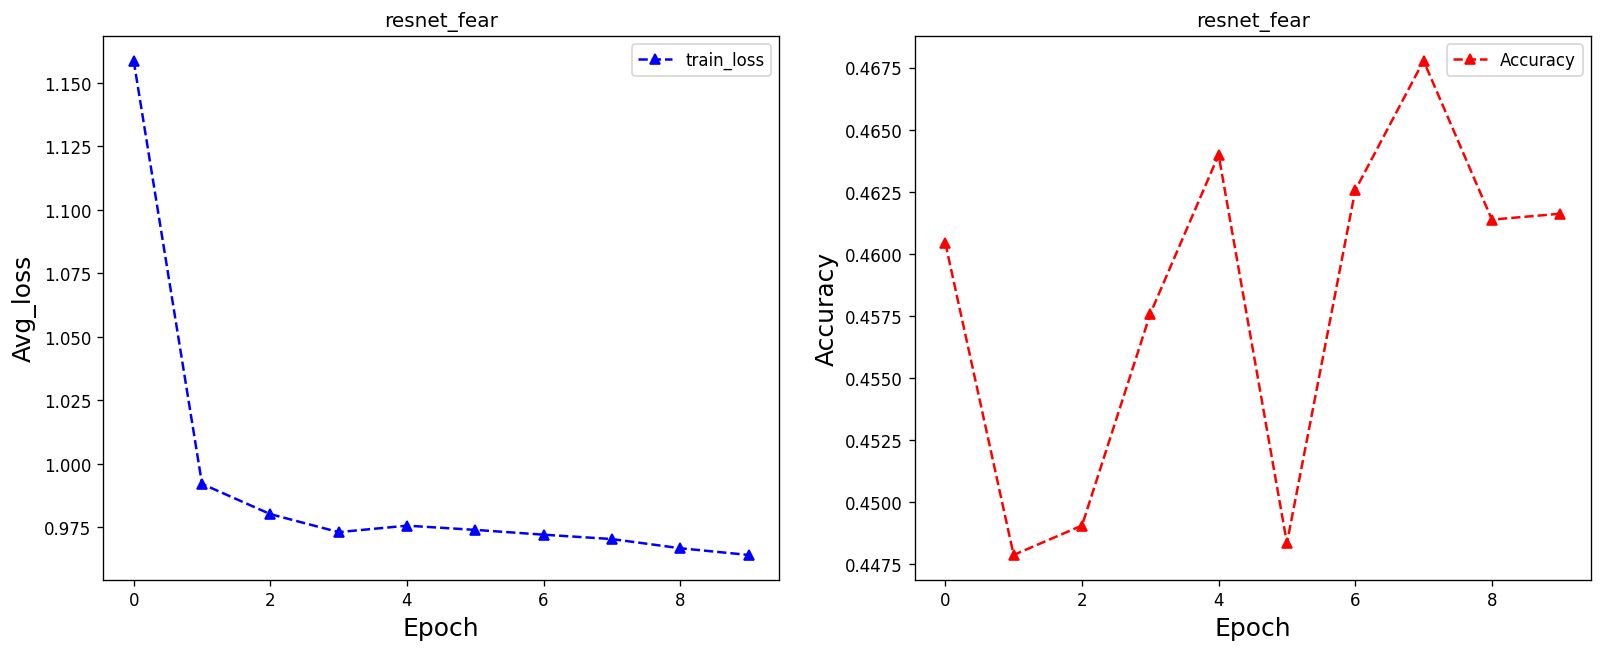

In [1242]:
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_record_resnet, 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("resnet_fear")
plt.legend(loc='best')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_record_resnet, 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("resnet_fear")
plt.legend(loc='best')


In [1222]:
# Saving model
torch.save(resnet_model.state_dict(),'resent_model.pth')

<span style="color:red;font-weight:1800;font-size:30px">
M5 model
</span><br/><br/>
<span style="color:red;font-weight:1800;font-size:20px">
Wav2vec 2.0 feature extraction
</span>

In [1243]:
from transformers import AutoFeatureExtractor
model_checkpoint = "facebook/wav2vec2-base-960h"
batch_size = 32
feature_extractor = AutoFeatureExtractor.from_pretrained(model_checkpoint)
feature_extractor(torchaudio.load('16Khz_1173_GM1001_1326493712.wav')[0],sampling_rate=16000)['input_values'][0].shape

(1, 1453739)

<span style="color:red;font-weight:1800;font-size:20px">
Dataset generation using wav2vec, five segments will be used for each sample
</span>

In [1247]:

class wav2vect_DS(Dataset):
    def __init__(self, df_lable, data_path='',prefix='16Khz_'):
        self.df = df_lable
        self.data_path = str(data_path)
        self.prefix=prefix
#     self.duration = 4000
#     self.sr = 44100
#     self.channel = 2
#     self.shift_pct = 0.4
            
  # ----------------------------
  # Number of items in dataset
  # ----------------------------
    def __len__(self):
        return len(self.df) 
    
  # ----------------------------
  # Get i'th item in dataset
  # ----------------------------
    def __getitem__(self, idx):
    # Absolute file path of the audio file - concatenate the audio directory with
    # the relative path
        audio_file = self.data_path + self.prefix+ self.df.loc[idx, 'path']
        
    # Get the Class ID
        class_id = self.df.loc[idx, 'label_ID']
        class_id_1=audio_file
        waveform,_ = torchaudio.load(audio_file)
        waveform=waveform[:1,:]
        audio_tensor=feature_extractor(waveform,sampling_rate=16000)['input_values'][0][:1,:]
        
        
        if audio_tensor.shape[1]>=78530:
            start_point=random.randint(0,waveform.shape[1]-79531)
            audio_tensor= audio_tensor[:,start_point:start_point+72000]
            
            return audio_tensor, class_id,class_id_1
        
        else:
            audio_file = '16Khz_6709_53113_1570147200.wav'
            class_id_1='16Khz_6709_53113_1570147200.wav'
            waveform,_ = torchaudio.load(audio_file)
            waveform=waveform[:1,:]
            audio_tensor=feature_extractor(waveform,sampling_rate=16000)['input_values'][0][:1,:]
            start_point=random.randint(0,waveform.shape[1]-79531)
            audio_tensor= audio_tensor[:,start_point:start_point+72000]
                
            class_id = 2

            return audio_tensor, class_id,class_id_1

        
wav_dataset=wav2vect_DS(mean_fear_5.reset_index())




In [1270]:
#save the tensor file, so don't need to the transformation everytime for training
path = '/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_fear_wav2vec_raw' 
#path put all the tensor and lable under/sample_test
os.makedirs(path, exist_ok = True) 
# torch.save(tensor , os.path.join(path,'model.pth'))

for idx, data in enumerate(wav_dataset_raw):
    print(data[0].shape)
    torch.save(data, os.path.join(path,f'sample_{idx}'))



In [1287]:
#read from local file
dataset2_wav=\
transformed_data('/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_fear_wav2vec_raw/')

In [1288]:
#training dataset
train_ds_wav, _ = random_split(dataset2_wav, [num_train, 0])
train_dl_wav = torch.utils.data.DataLoader(train_ds_wav,batch_size=16, shuffle=True)


<span style="color:red;font-weight:1800;font-size:20px">
M5 model
</span>

In [1289]:
import torch.nn.functional as F
class M5(nn.Module):
    def __init__(self, n_input=1, n_output=5, stride=16, n_channel=32):
        super().__init__()
        self.conv1 = nn.Conv1d(n_input, n_channel, kernel_size=80, stride=stride)
        self.bn1 = nn.BatchNorm1d(n_channel)
        self.pool1 = nn.MaxPool1d(4)
        self.conv2 = nn.Conv1d(n_channel, n_channel, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(n_channel)
        self.pool2 = nn.MaxPool1d(4)
        self.conv3 = nn.Conv1d(n_channel, 2 * n_channel, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(2 * n_channel)
        self.pool3 = nn.MaxPool1d(4)
        self.conv4 = nn.Conv1d(2 * n_channel, 2 * n_channel, kernel_size=3)
        self.bn4 = nn.BatchNorm1d(2 * n_channel)
        self.pool4 = nn.MaxPool1d(4)
        self.fc1 = nn.Linear(2 * n_channel, n_output)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(self.bn1(x))
        x = self.pool1(x)
        x = self.conv2(x)
        x = F.relu(self.bn2(x))
        x = self.pool2(x)
        x = self.conv3(x)
        x = F.relu(self.bn3(x))
        x = self.pool3(x)
        x = self.conv4(x)
        x = F.relu(self.bn4(x))
        x = self.pool4(x)
        x = F.avg_pool1d(x, x.shape[-1])
        x = x.permute(0, 2, 1)
        x = self.fc1(x)
        return F.log_softmax(x, dim=2)






<span style="color:red;font-weight:1800;font-size:20px">
Model training
</span>

In [1295]:

# loss_m5_raw=[]
# accuracy_m5_raw=[]
# ----------------------------
# Training Loop
# ------------------------------
def training_wav2vec(model, train_dl, num_epochs):
  # Loss Function, Optimizer and Scheduler
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=0.0001)
    
#   scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,
#                                                 steps_per_epoch=int(len(train_dl)),
#                                                 epochs=num_epochs,
#                                                 anneal_strategy='linear')

  # Repeat for each epoch
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

    # Repeat for each batch in the training set
        
        for i, data in enumerate(tqdm_notebook(train_dl)):
        # Get the input features and target labels, and put them on the GPU
            inputs, labels = data[0], data[1]
            
        # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m) / inputs_s

        # Zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
            outputs = model(inputs)
            
            loss = F.nll_loss(outputs.squeeze(), labels)
#             loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            

        # Keep stats for Loss and Accuracy
            running_loss += loss.item()

        # Get the predicted class with the highest score
            
            _, prediction = torch.max(outputs.squeeze(),1)
            
            # Count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

        #if i % 10 == 0:    # print every 10 mini-batches
        #    print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 10))
    
    # Print stats at the end of the epoch
        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction/total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')
        loss_m5_raw.append(avg_loss)
        accuracy_m5_raw.append(acc)

 # Just for demo, adjust this higher.
model_m5_raw = M5(1, 4)
training_wav2vec(model_m5_raw, train_dl_wav, 10)


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 0, Loss: 0.82, Accuracy: 0.65


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 1, Loss: 0.81, Accuracy: 0.65


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 2, Loss: 0.80, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 3, Loss: 0.80, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 4, Loss: 0.80, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 5, Loss: 0.78, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 6, Loss: 0.78, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 7, Loss: 0.78, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 8, Loss: 0.79, Accuracy: 0.66


  0%|          | 0/264 [00:00<?, ?it/s]

Epoch: 9, Loss: 0.78, Accuracy: 0.66


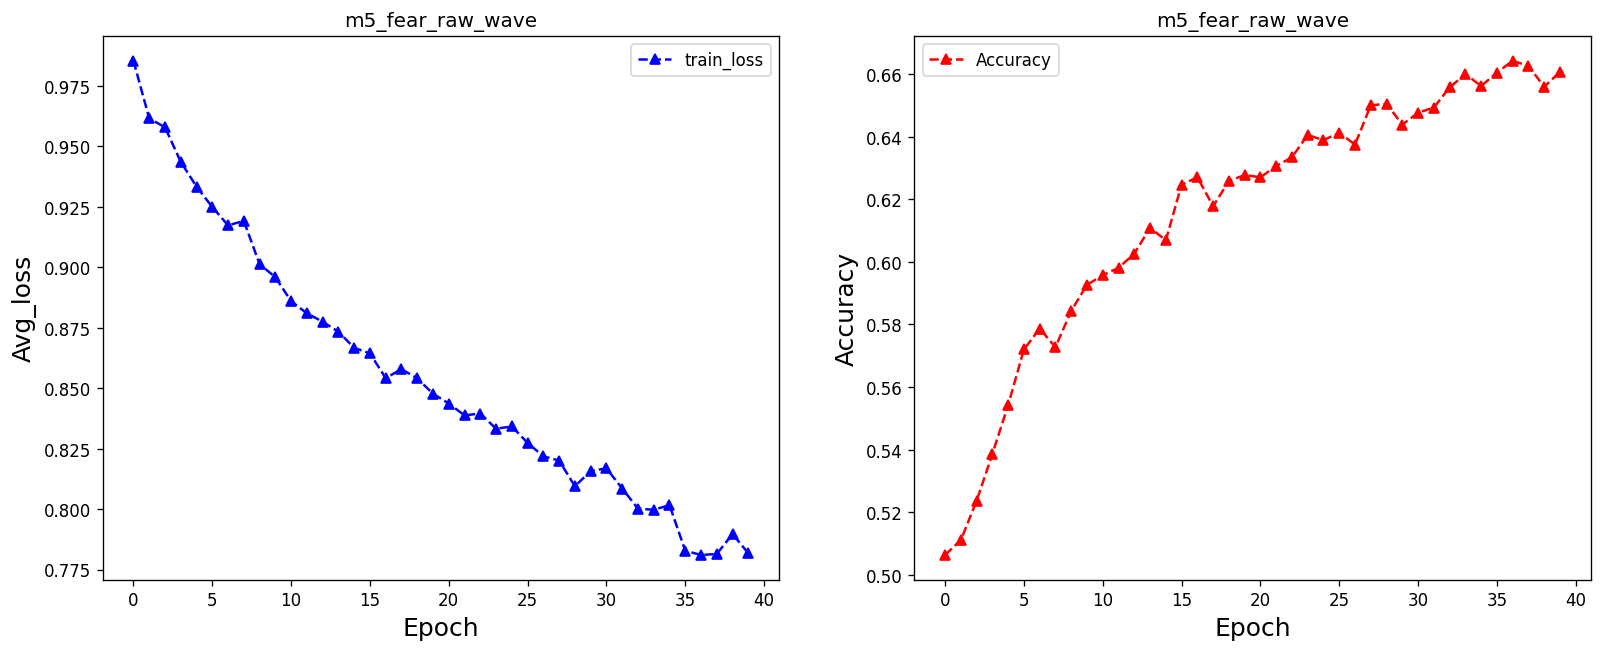

In [1296]:
#training loss curve using raw waveform data
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_m5_raw, 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("m5_fear_raw_wave")
plt.legend(loc='best')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_m5_raw, 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("m5_fear_raw_wave")
plt.legend(loc='best')

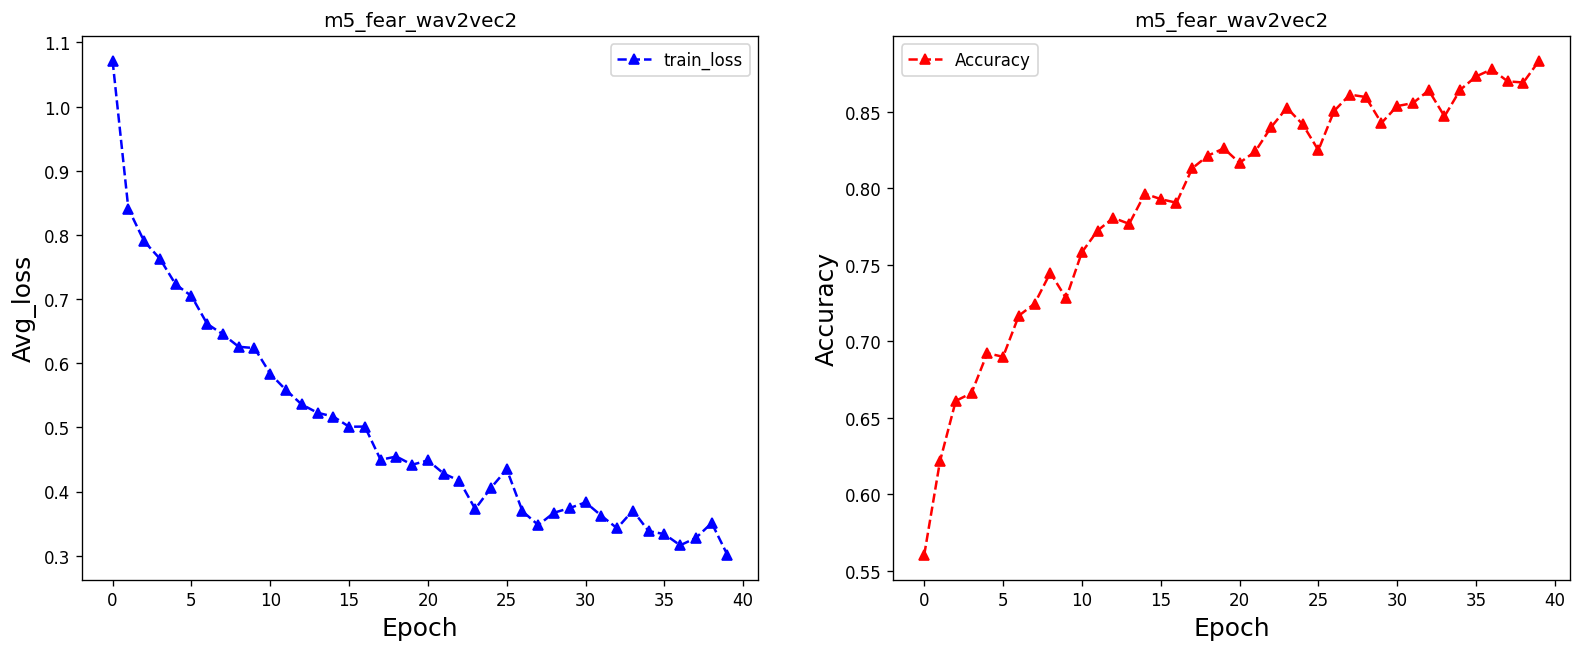

In [1306]:
#training loss curve using wav2vec2.0 feature extracted data
plt.figure(dpi=120,figsize=(16,6))
plt.subplot(1, 2, 1) # row 1, col 2 index 1

plt.plot(loss_m5, 'b--^', label='train_loss')

plt.xlabel("Epoch",size=15)
plt.ylabel("Avg_loss",size=15)
plt.title("m5_fear_wav2vec2")
plt.legend(loc='best')

plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(accuracy_m5, 'r--^', label='Accuracy')

plt.xlabel("Epoch",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("m5_fear_wav2vec2")
plt.legend(loc='best')


<span style="color:red;font-weight:1800;font-size:20px">
Model test the same way as before for 211 samples
</span>

In [1262]:
#dataset generation
combwav_fear_test=pd.concat([mean_fear_test,mean_fear_test,mean_fear_test,mean_fear_test,mean_fear_test])
dataset_test=wav2vect_DS(combwav_fear_test.reset_index())
path = '/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_wav_fear_test' 

os.makedirs(path, exist_ok = True) 
# torch.save(tensor , os.path.join(path,'model.pth'))

for idx, data in enumerate(dataset_test):

    torch.save(data, os.path.join(path,f'sample_{idx}'))


KeyError: 1055

In [1263]:
#dataset reading from locally saved files
dataset2_wave_test=transformed_data('/Users/ywrz/Downloads/voice_labeling_report_21_May_22/processed/sample_list_wav_fear_test')

train_ds_test, val_ds_test = random_split(dataset2_wave_test, [0, 1055])

val_dl_test = torch.utils.data.DataLoader(val_ds_test,batch_size=1055, shuffle=False) 


In [1264]:
#model prediction raw accuracy

correct_prediction = 0
total_prediction = 0

with torch.no_grad():
    for data in val_dl_test:
      # Get the input features and target labels, and put them on the GPU
        inputs, labels = data[0], data[1]

      # Normalize the inputs
        inputs_m, inputs_s = inputs.mean(), inputs.std()
        inputs = (inputs - inputs_m) / inputs_s
      # Get predictions
        outputs = model_m5(inputs)

      # Get the predicted class with the highest score
#         _, prediction = torch.max(outputs,1)
      # Count of predictions that matched the target label
        _, prediction = torch.max(outputs.squeeze(),1)
        correct_prediction += (prediction == labels).sum().item()
        total_prediction += prediction.shape[0]
    
acc = correct_prediction/total_prediction
print(f'Accuracy: {acc:.2f}, Total items: {total_prediction}')

Accuracy: 0.52, Total items: 1055


In [1265]:
#model prediction final accuracy

test_prediction = ({
    '.wav':wav,
    'pred_1' : prediction,
    
    'true_label':labels
               })
test_prediction = pd.DataFrame(test_prediction)
a=test_prediction.groupby('.wav').agg({'pred_1': lambda x:x.value_counts().index[0],
                                       'true_label': lambda x:x.value_counts().index[0]}).reset_index()

(a['pred_1']==a['true_label']).sum()/211

0.5497630331753555

<span style="color:red;font-weight:1800;font-size:30px">
Final results from CNN model
</span><br/><br/>


In [25]:
table=pd.DataFrame({'emotions':['sadness','anger','fear'],'raw accuracy':[0.54,0.58,0.61],'final_accuracy':[0.59,0.64,0.67]})
display(table)

,emotions,raw accuracy,final_accuracy
0,sadness,0.54,0.59
1,anger,0.58,0.64
2,fear,0.61,0.67
